In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Automobile_dataset/"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv(your_local_path+"automobile.csv" ,
                     header=None, names=headers, na_values="?" )

In [4]:
#setting to display all the columns of the dataframe

pd.options.display.max_columns=False

In [5]:
df_raw.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
df_raw.shape

(205, 26)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [8]:
df_raw.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
df_raw['num_doors'].unique()

array(['two', 'four', nan], dtype=object)

In [10]:
df_raw.loc[df_raw['num_doors'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [11]:
df_raw.bore.loc[df_raw['make']=='mazda'].mean()

3.2869230769230766

In [12]:
df_raw.stroke.loc[df_raw['make']=='mazda'].mean()

3.2992307692307694

In [13]:
#df_raw.bore.loc[df_raw['make']=='mazda'].mean()

In [14]:
df_raw['num_doors']=df_raw['num_doors'].fillna(4)

In [15]:
df_raw.loc[df_raw['bore'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [16]:
df_raw['bore']=df_raw['bore'].fillna(3.28)

In [17]:
df_raw.loc[df_raw['stroke'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.28,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.28,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.28,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.28,NaN,9.4,135.0,6000.0,16,23,15645.0


In [18]:
df_raw['stroke'] = df_raw['stroke'].fillna(3.29) 

In [19]:
df_raw.loc[df_raw['horsepower'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [20]:
df_raw[(df_raw['make'] == 'renault') & (df_raw['body_style']=='wagon')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0


In [21]:
df_raw.horsepower[df_raw['engine_size'] >= 130].mean()

142.45205479452054

In [22]:
df_raw['horsepower']=df_raw['horsepower'].fillna(142.45)

In [23]:
df_raw.peak_rpm[df_raw['engine_size'] >= 130].mean()

5018.493150684932

In [24]:
df_raw['peak_rpm']=df_raw['peak_rpm'].fillna(5018.49)

In [25]:
df_raw=df_raw[df_raw['price'].notnull()]

In [26]:
for i in df_raw['make'].unique():
    print(i,df_raw.make.loc[df_raw['make']==i].count())

alfa-romero 3
audi 6
bmw 8
chevrolet 3
dodge 9
honda 13
isuzu 2
jaguar 3
mazda 17
mercedes-benz 8
mercury 1
mitsubishi 13
nissan 18
peugot 11
plymouth 7
porsche 4
renault 2
saab 6
subaru 12
toyota 32
volkswagen 12
volvo 11


In [27]:
df_raw.groupby('make')

In [28]:
df_raw.loc[df_raw['normalized_losses'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.00,5000.00,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.00,5000.00,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.00,5000.00,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.00,5500.00,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.00,5500.00,19,25,18920.0
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.00,4250.00,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.00,5400.00,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.00,5400.00,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.00,5400.00,15,20,36880.0
43,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.00,4800.00,24,29,6785.0


In [29]:
pd.crosstab(df_raw.make, df_raw.normalized_losses.isnull(),margins=True)

normalized_losses,False,True,All
make,,,
alfa-romero,0,3,3
audi,4,2,6
bmw,4,4,8
chevrolet,3,0,3
dodge,9,0,9
honda,13,0,13
isuzu,0,2,2
jaguar,1,2,3
mazda,15,2,17


In [30]:
df_raw.loc[(df_raw['normalized_losses'].isnull()) & (df_raw['make']=='audi')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,18920.0


In [31]:
df_raw.loc[df_raw['make']=='audi']

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0


In [32]:
for i in df_raw['make'].unique():
    j=df_raw.loc[df_raw['make']==i,'normalized_losses'].mean()
    j=float(str(round(j,2)))
    df_raw.loc[(df_raw['normalized_losses'].isnull()) & (df_raw['make']==i),'normalized_losses']=j

In [33]:
df_raw.loc[df_raw['normalized_losses'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.00,5000.00,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.00,5000.00,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.00,5000.00,19,26,16500.0
43,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.00,4800.00,24,29,6785.0
46,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90.00,5000.00,24,29,11048.0
75,1,NaN,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175.00,5000.00,19,24,16503.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,142.45,5018.49,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,142.45,5018.49,23,31,9895.0


In [34]:
df_raw['normalized_losses'].mean()

125.91269430051814

In [35]:
df_raw['normalized_losses']=df_raw['normalized_losses'].fillna(125.91)

In [36]:
df_raw.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,125.91,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,125.91,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,125.91,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.00,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.00,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,161.00,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.00,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,161.00,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.00,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.00,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [37]:
df_raw.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.912587,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.257562,10.164279,103.785572,5116.601891,25.179104,30.686567,13207.129353
std,1.254802,35.058807,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.316082,4.004965,37.567111,478.214845,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    201 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_cylinders        201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-

In [39]:
corr=df_raw.corr()

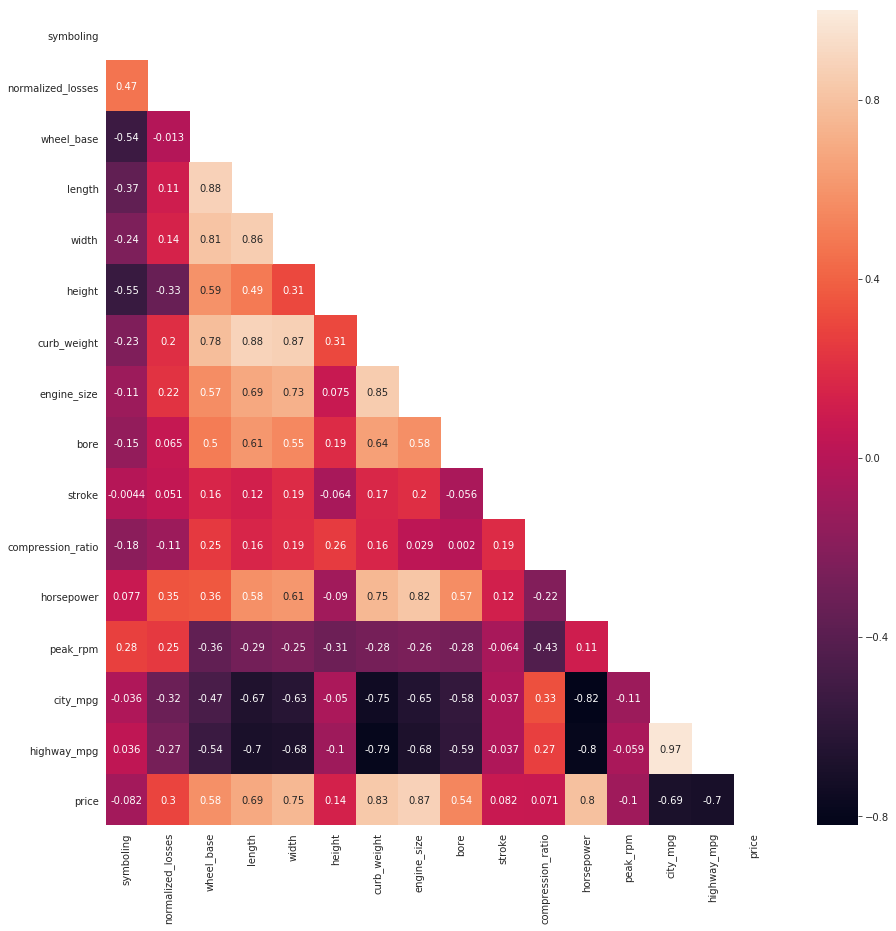

In [40]:
plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, annot=True)

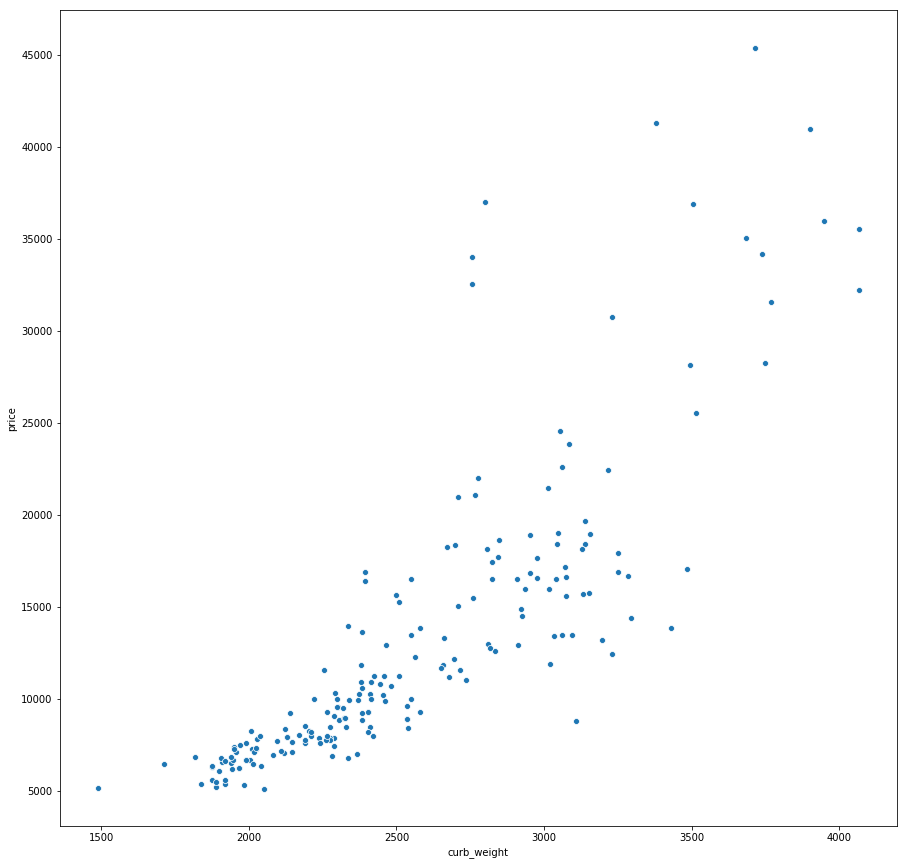

In [56]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="curb_weight",y="price",data=df_raw)

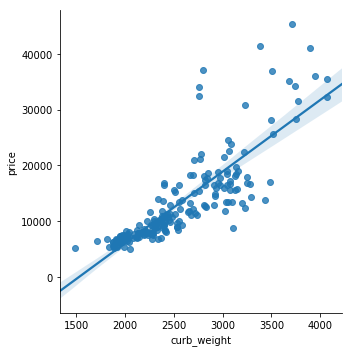

In [66]:
sns.lmplot(x="curb_weight",y="price",data=df_raw)

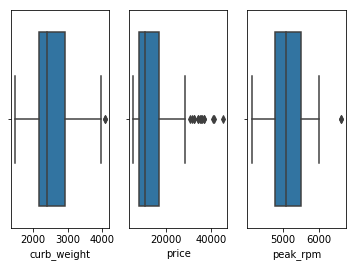

In [81]:
fig, axs = plt.subplots(ncols=3)

sns.boxplot(x="curb_weight",data=df_raw,ax=axs[0])
sns.boxplot(x="price",data=df_raw,ax=axs[1])
sns.boxplot(x="peak_rpm",data=df_raw,ax=axs[2])
plt.show()

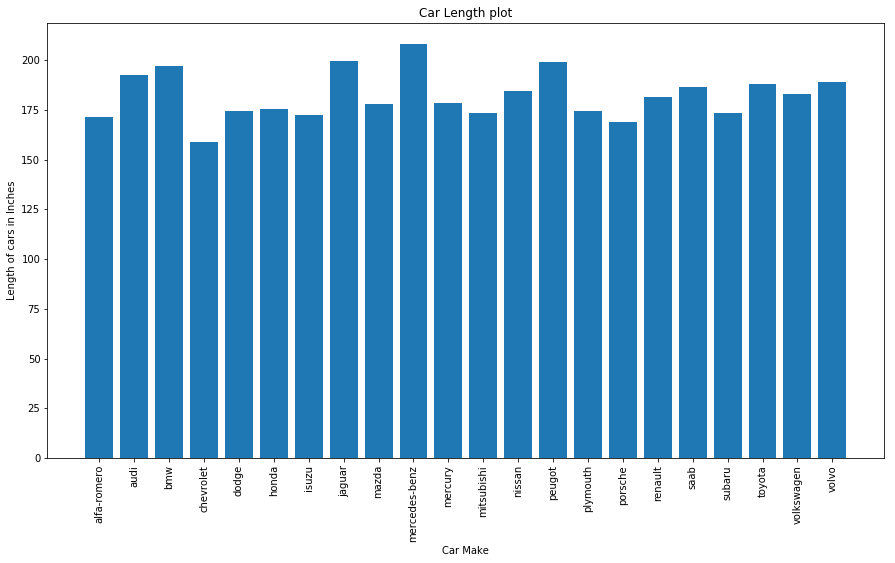

In [110]:
plt.figure(figsize=(15,8))
plt.bar(x="make",height="length",data=df_raw)
plt.xlabel('Car Make')
plt.ylabel('Length of cars in Inches')
plt.xticks(rotation=90)
plt.title('Car Length plot')
plt.show()

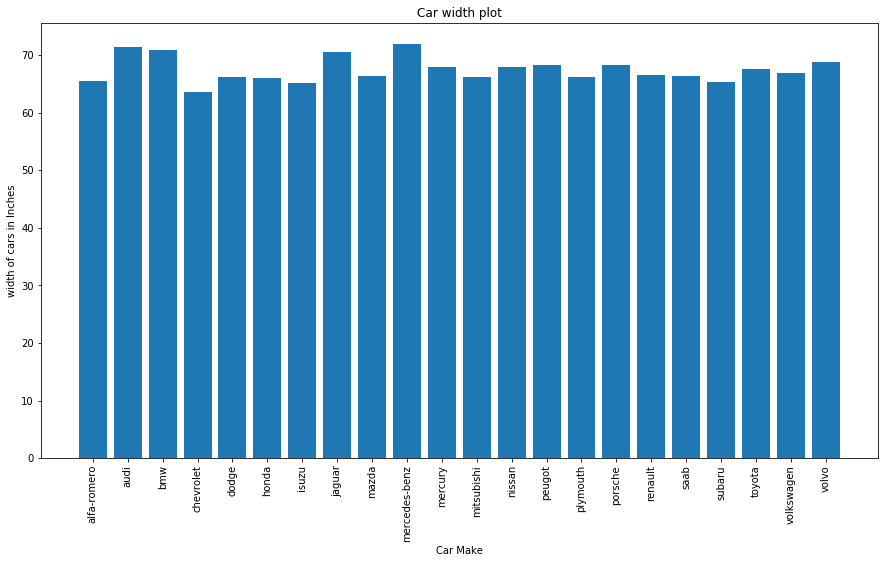

In [111]:
plt.figure(figsize=(15,8))
plt.bar(x="make",height="width",data=df_raw)
plt.xlabel('Car Make')
plt.ylabel('width of cars in Inches')
plt.xticks(rotation=90)
plt.title('Car width plot')
plt.show()

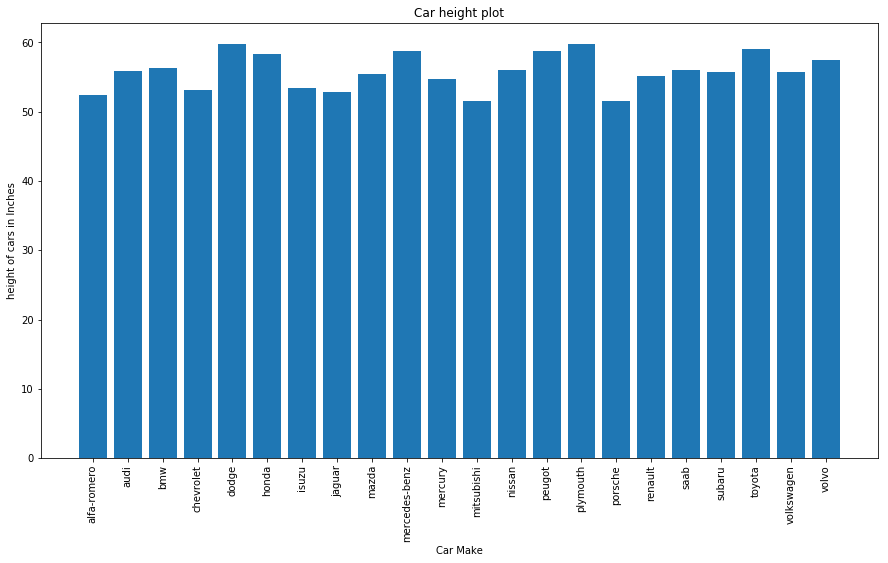

In [112]:
plt.figure(figsize=(15,8))
plt.bar(x="make",height="height",data=df_raw)
plt.xlabel('Car Make')
plt.ylabel('height of cars in Inches')
plt.xticks(rotation=90)
plt.title('Car height plot')
plt.show()

<Figure size 1800x1800 with 0 Axes>

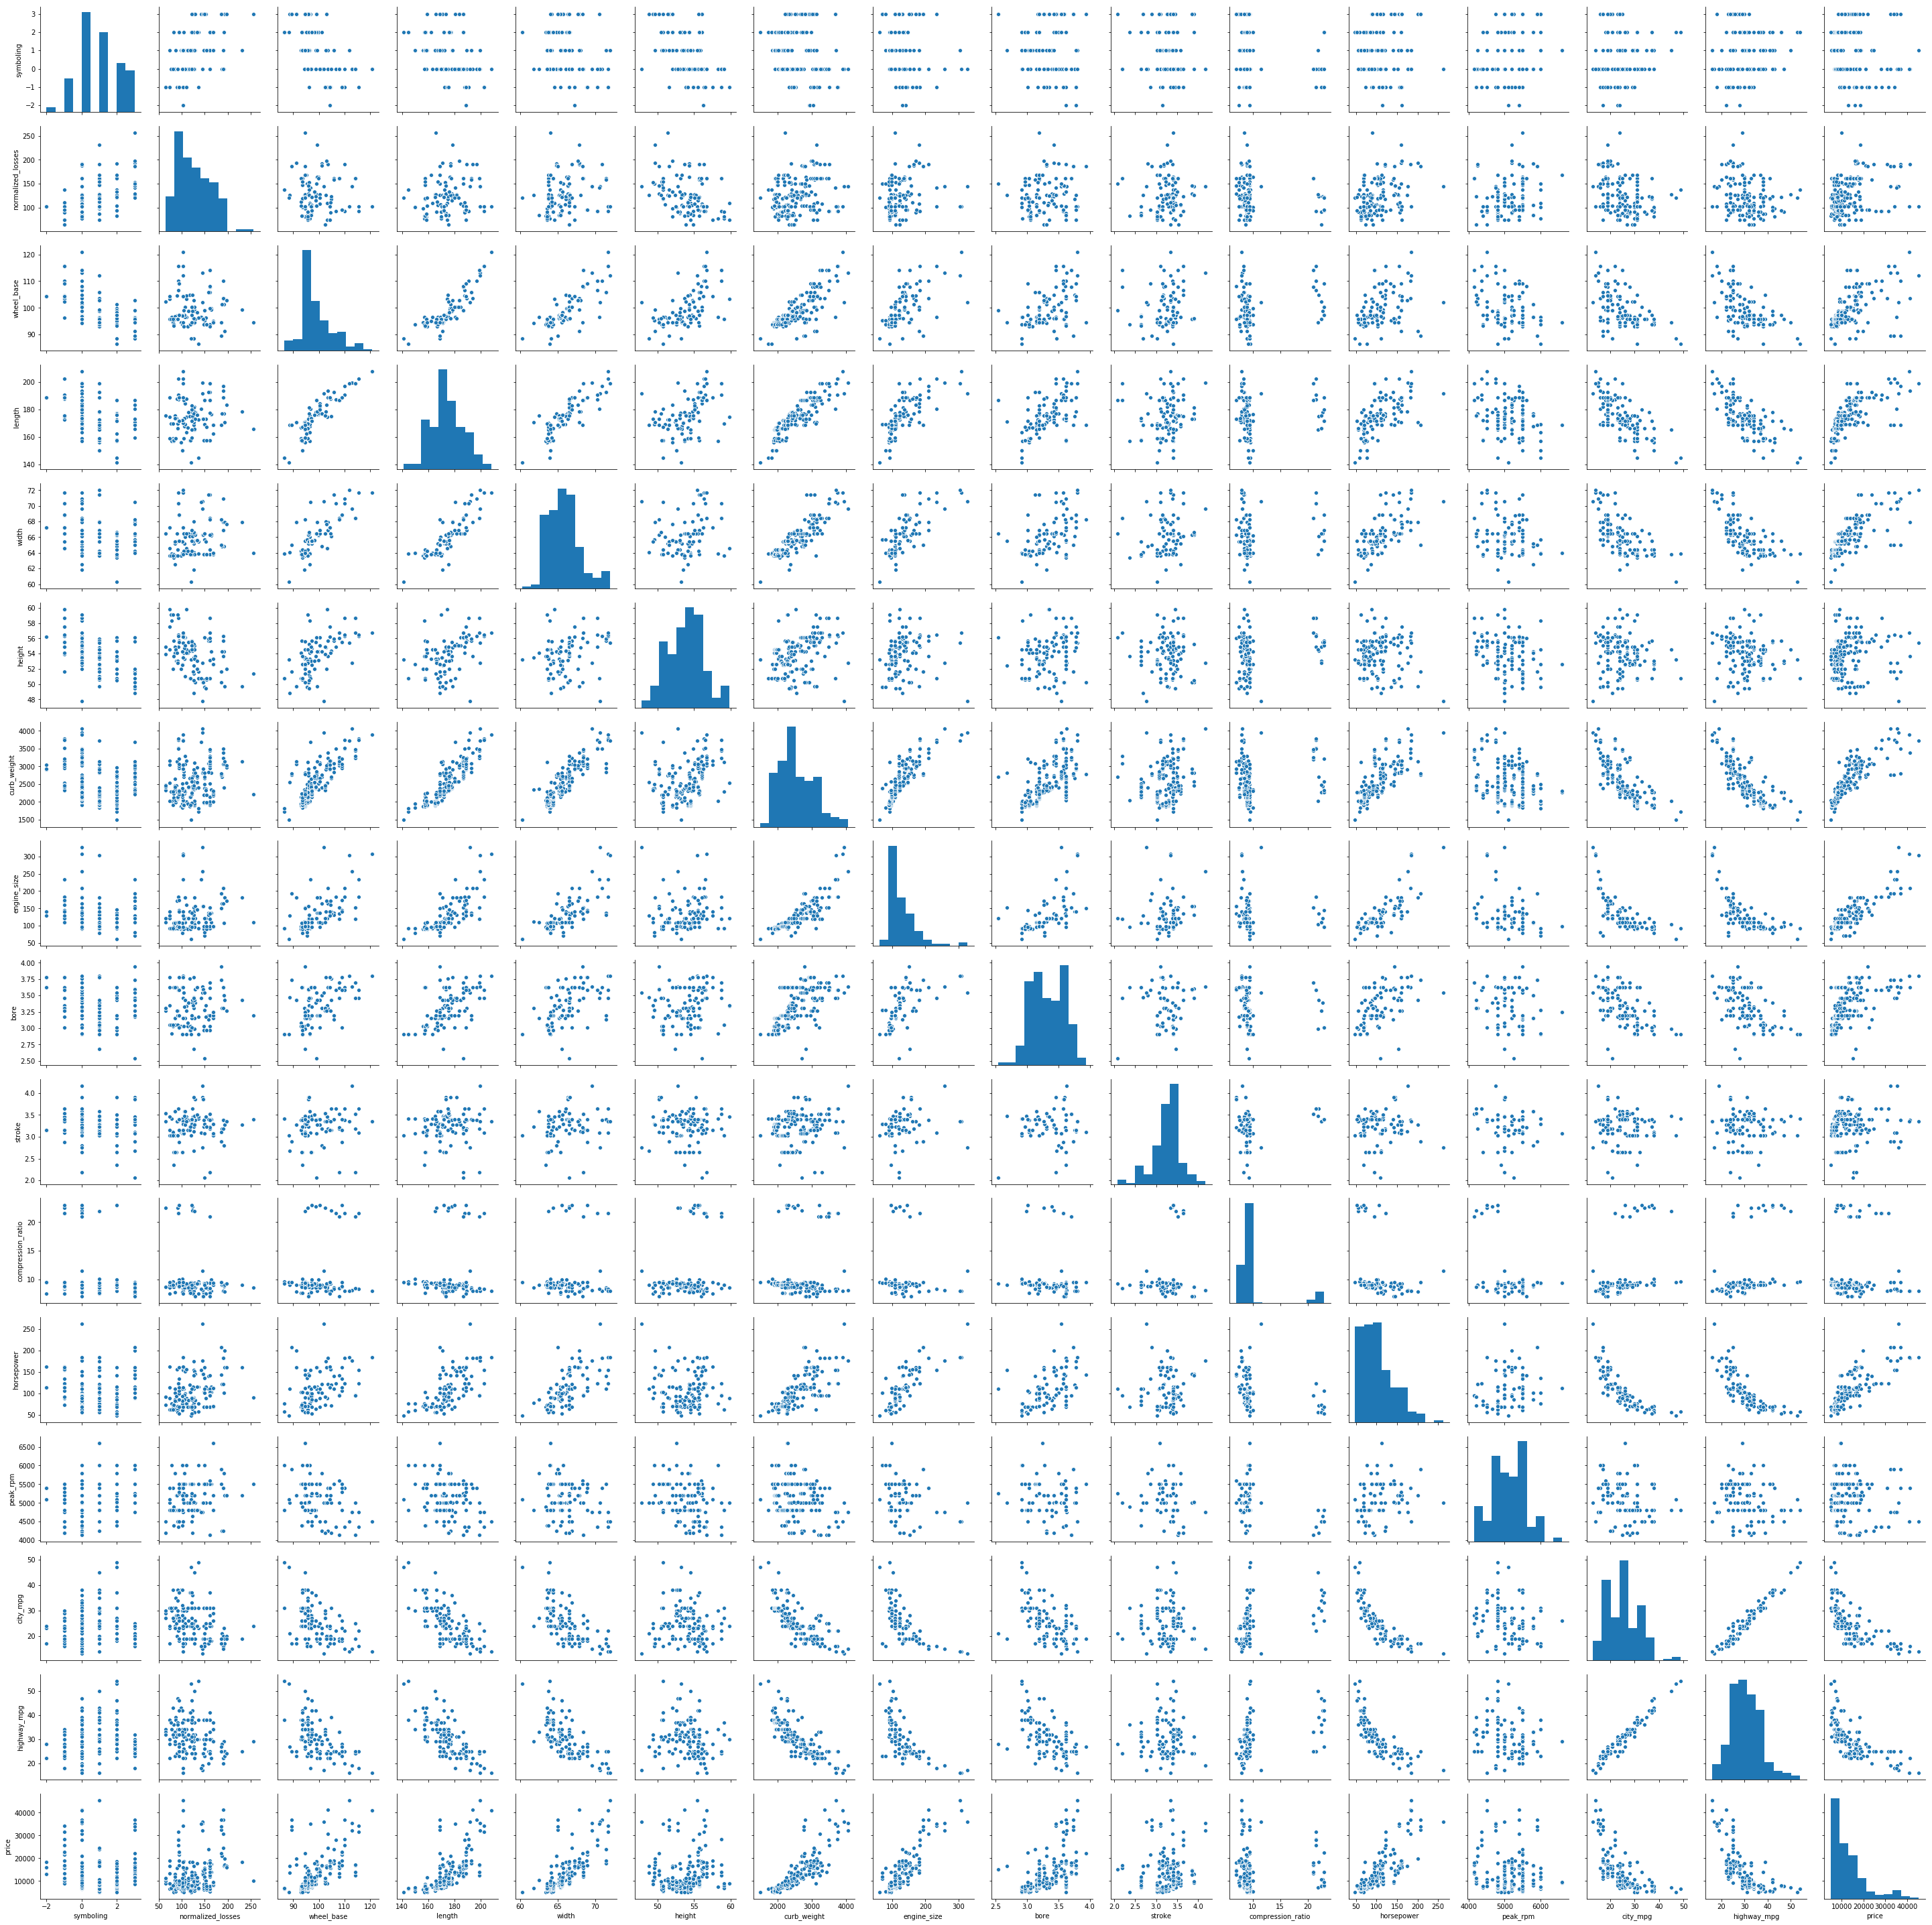

In [83]:
plt.figure(figsize=[25,25])
sns.pairplot(df_raw)
plt.show()

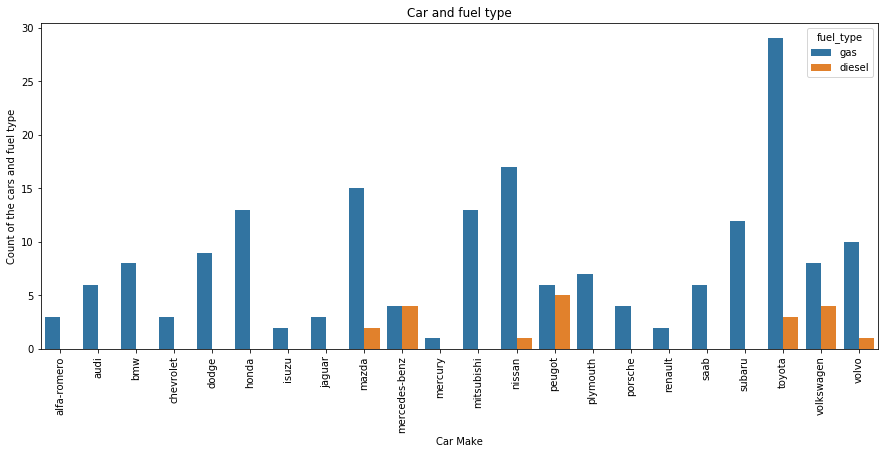

In [85]:
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
sns.countplot(df_raw.make,hue=df_raw.fuel_type)
plt.xlabel('Car Make')
plt.ylabel('Count of the cars and fuel type')
plt.title('Car and fuel type')
plt.show()

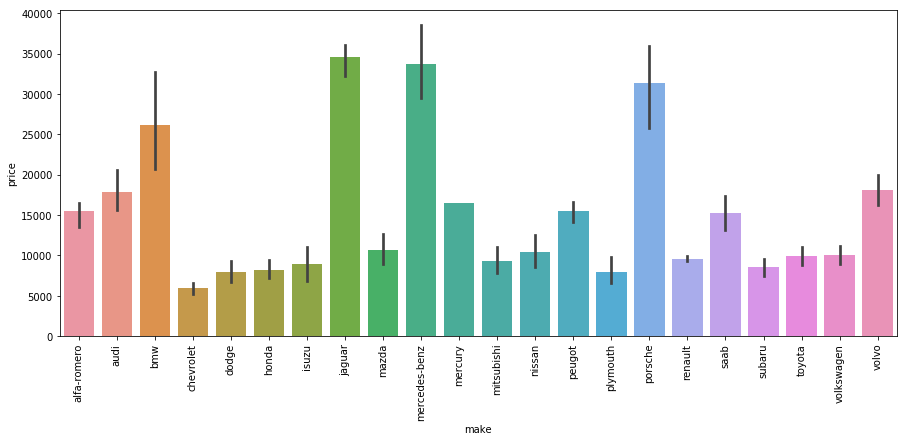

In [86]:
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
sns.barplot(x='make', y = 'price', data = df_raw)
plt.show()

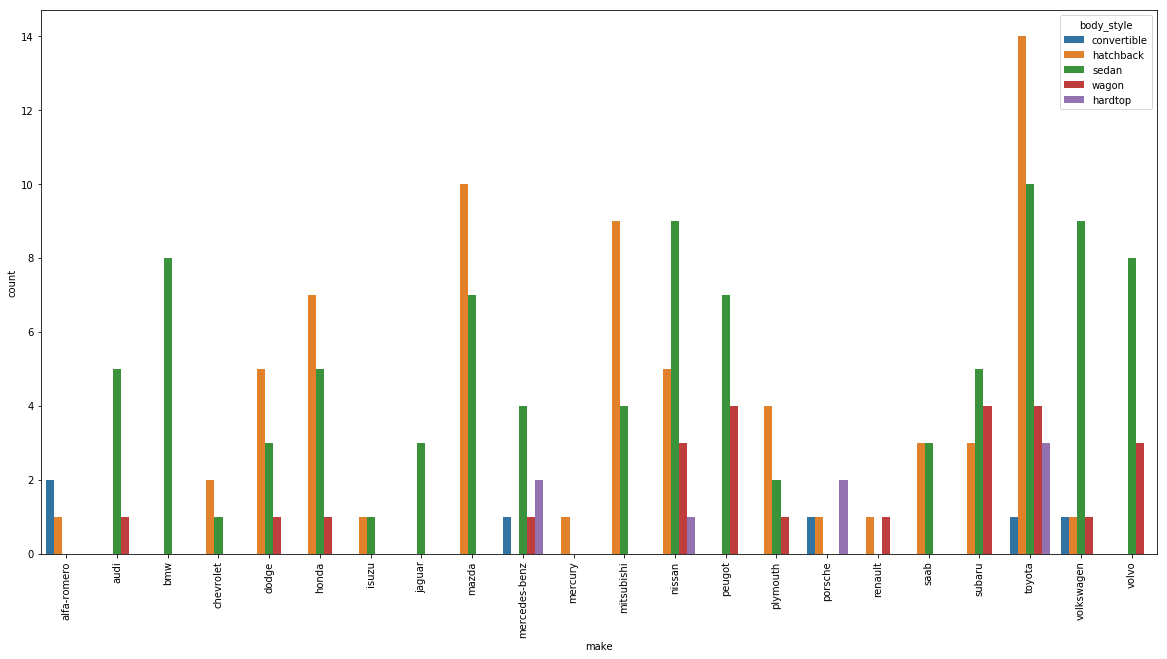

In [90]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.countplot(df_raw.make,hue=df_raw.body_style,)
plt.show()

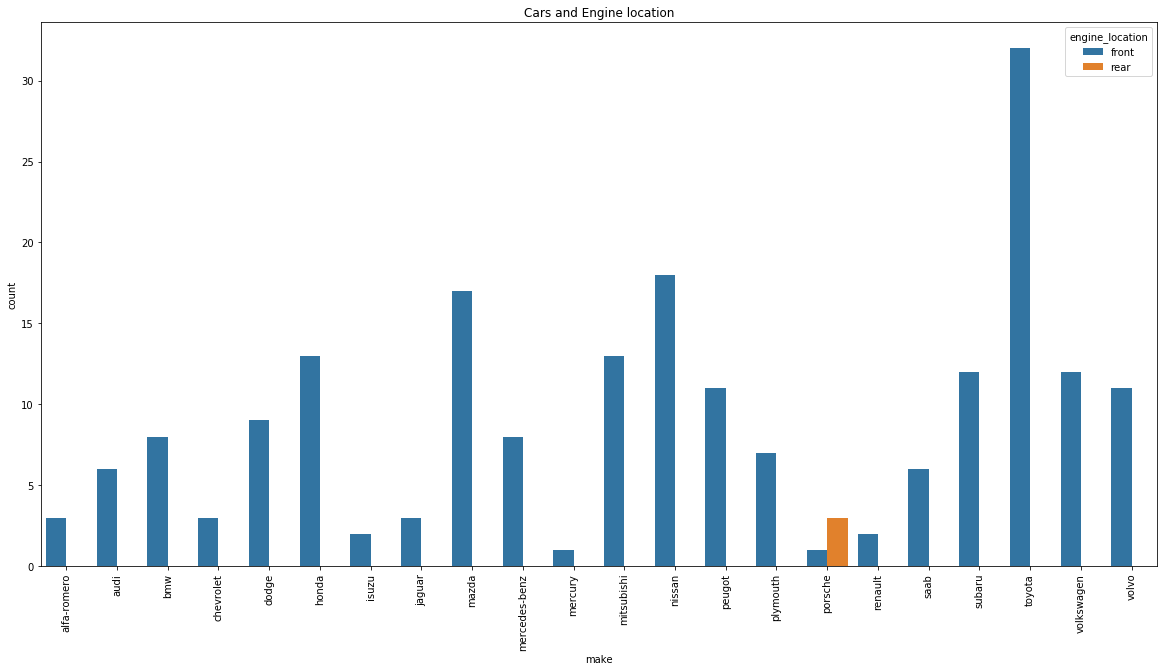

In [92]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.countplot(df_raw.make,hue=df_raw.engine_location)
plt.title("Cars and Engine location")
plt.show()

<Figure size 1440x720 with 0 Axes>

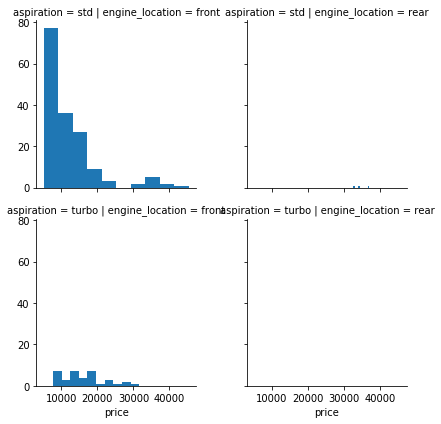

In [109]:
plt.figure(figsize=[20,10])
#plt.xticks(rotation=90)
g = sns.FacetGrid(df_raw, col="engine_location",  row="aspiration")
g = g.map(plt.hist, "price")
plt.show()

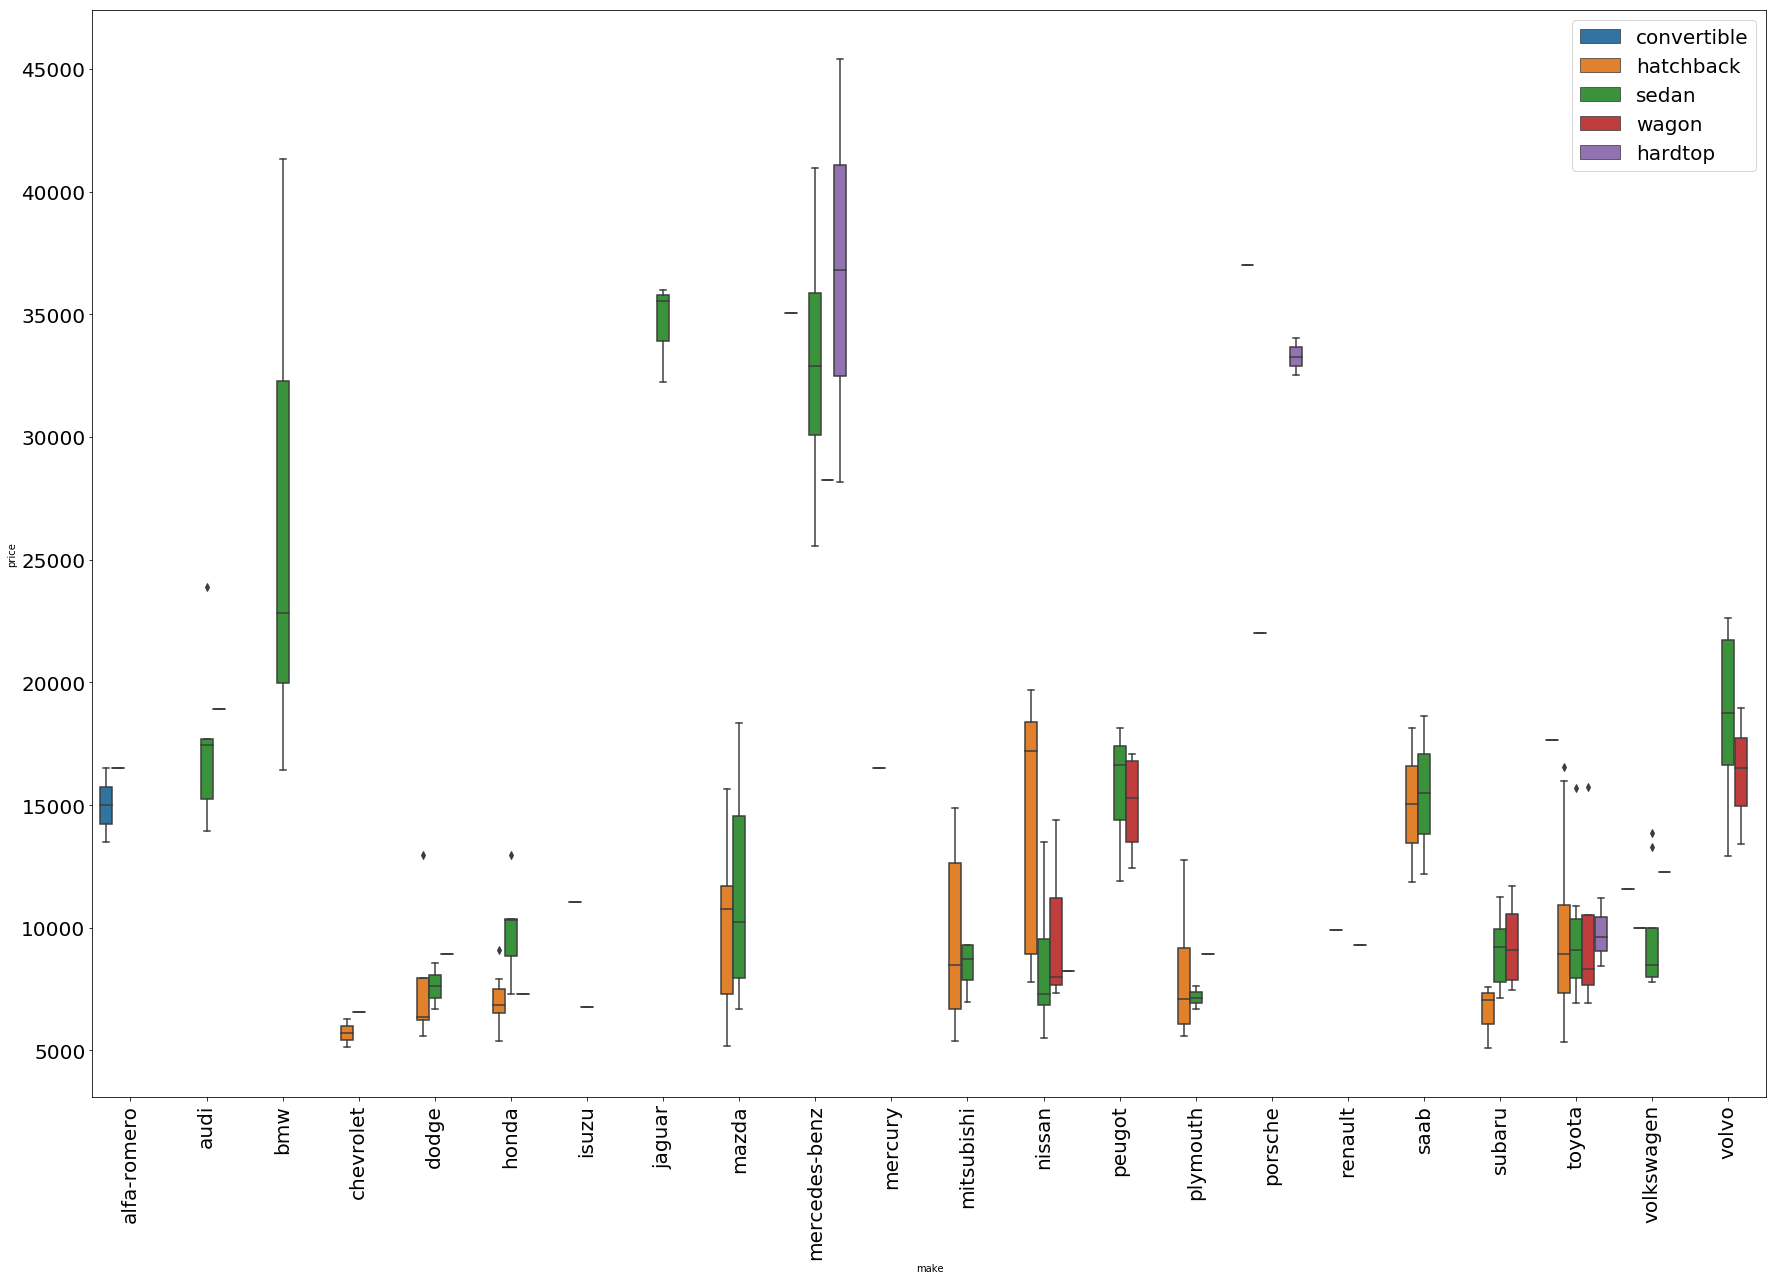

In [129]:
plt.figure(figsize=[30,20])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(df_raw.make,fontsize=20)
sns.boxplot(x='make', y = 'price', hue='body_style', data = df_raw)
plt.legend(fontsize=20)
plt.show()

In [ ]:
df_raw["fuel_type"]=df_raw["fuel_type"].replace({'gas':0,'diesel':1})

In [ ]:
df_raw["aspiration"]=df_raw["aspiration"].replace({'std':0,'turbo':1})

In [ ]:
df_raw["num_doors"]=df_raw["num_doors"].replace({4:0})

In [ ]:
df_raw["num_doors"]=df_raw["num_doors"].replace({'two':0,'four':1})

In [ ]:
df_raw["drive_wheels"]=df_raw["drive_wheels"].replace({'rwd':0,'fwd':1,'4wd':1})

In [ ]:
df_raw["engine_location"]=df_raw["engine_location"].replace({'front':0,'rear':1})

In [ ]:
df_raw["num_cylinders"]=df_raw["num_cylinders"].replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

In [ ]:
df_raw["fuel_system"]=df_raw["fuel_system"].astype('category')
print(df_raw["fuel_system"].dtypes)
df_raw["fuel_system"]=df_raw["fuel_system"].cat.codes

In [ ]:
df_raw["body_style"]=df_raw["body_style"].astype('category')
df_raw["body_style"].dtypes
df_raw["body_style"]=df_raw["body_style"].cat.codes

In [ ]:
df_raw["OHC_Code"]=np.where(df_raw["engine_type"].str.contains("ohc"),1,0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make=LabelEncoder()
df_raw["make_code"]=lb_make.fit_transform(df_raw["make"])
df_raw[["make","make_code"]].head(11)

In [ ]:
df_raw.head()

In [ ]:
df_raw.describe()

In [ ]:
df_raw_y=df_raw["price"].values

In [ ]:
df_raw_y.shape

In [ ]:
df_raw.columns

In [ ]:
#col1=[]

In [ ]:
df_raw_x=df_raw[list(col1)].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df_raw_x, df_raw_y, random_state=1, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn import model_selection, metrics
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

In [ ]:
coef1=pd.DataFrame(lin_model.coef_,index=col1)

In [ ]:
coef1

In [ ]:
data_train_predictions = lin_model.predict(X_test)

In [ ]:
data_train_predictions[:8]

In [ ]:
print("RMSE:", (np.sqrt(metrics.mean_squared_error(y_test,data_train_predictions))))

In [ ]:
lin_model.score(X_test,y_test)

In [ ]:
print(metrics.r2_score(y_test,data_train_predictions))